In [98]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [99]:
df = pd.read_csv("drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


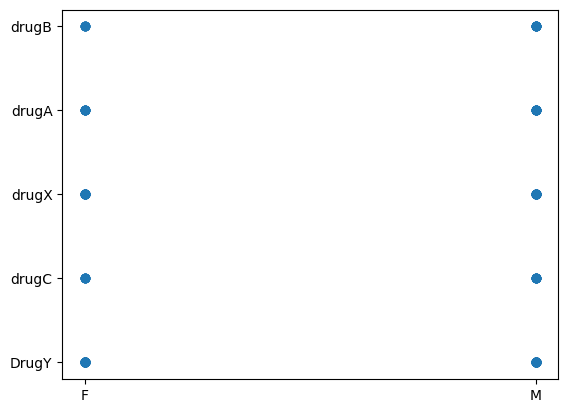

In [101]:
plt.scatter(df.Sex, df.Drug)

In [102]:
df.drop(columns="Sex", inplace=True)
df.head()

,Age,BP,Cholesterol,Na_to_K,Drug
0,23,HIGH,HIGH,25.355,DrugY
1,47,LOW,HIGH,13.093,drugC
2,47,LOW,HIGH,10.114,drugC
3,28,NORMAL,HIGH,7.798,drugX
4,61,LOW,HIGH,18.043,DrugY


In [103]:
df.isna().sum()

Age            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [104]:
df.BP.unique(), df.Cholesterol.unique(), df.Drug.unique()

(array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object),
 array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object))

In [105]:
df.BP = df.BP.map({'HIGH' : 0, 'LOW': 1, 'NORMAL': 2})
df.Cholesterol = df.Cholesterol.map({'HIGH' : 0, 'NORMAL': 1})

In [106]:
X = df.drop(columns="Drug")
y = df.Drug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = RandomForestClassifier(n_estimators=7)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7)

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        76
       drugC       1.00      1.00      1.00        17
       drugX       1.00      1.00      1.00        13
       drugA       1.00      1.00      1.00        11
       drugB       1.00      1.00      1.00        43

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



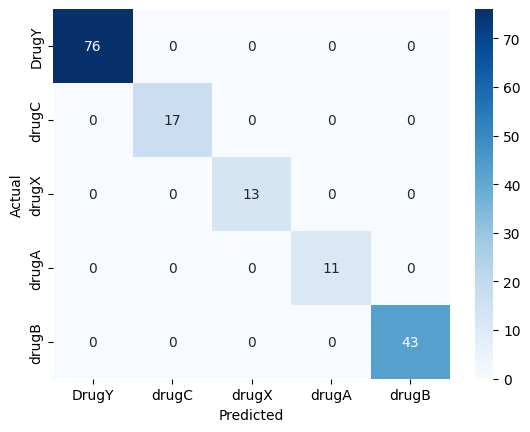

In [108]:
y_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
sns.heatmap(cm_train, cmap="Blues", annot=True, xticklabels=df.Drug.unique(), yticklabels=df.Drug.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_train, y_pred, target_names=df.Drug.unique()))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00         3
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



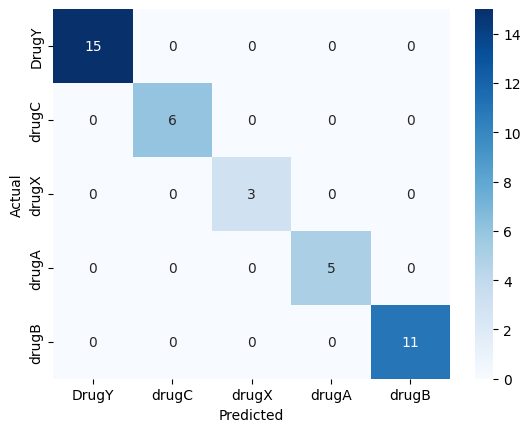

In [109]:
y_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test, cmap="Blues", annot=True, xticklabels=df.Drug.unique(), yticklabels=df.Drug.unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test, y_pred, target_names=df.Drug.unique()))